In [85]:
import pandas as pd

In [86]:
import numpy as np

In [87]:
import datetime as dt

In [88]:
from collections import Counter

In [89]:
import matplotlib.pyplot as plt

In [90]:
from IPython.display import clear_output



### Import Data

In [7]:
XRP_Increase = pd.read_csv('../XRP_5min_Increase_SmallAmount_5min.csv')
XRP_Decrease = pd.read_csv('../XRP_5min_Decrease_SmallAmount_5min.csv')

In [8]:
original_columns = ['datetime_real','date','close','high','low','open','quoteVolume','volume','weightedAverage']

In [9]:
XRP_Increase.head()

,Unnamed: 0,Unnamed: 0.1,close,date,high,low,open,quoteVolume,volume,weightedAverage,...,Increase_0.1_percent,Increase_0.2_percent,Increase_0.3_percent,Increase_0.4_percent,Increase_0.5_percent,Increase_0.6_percent,Increase_0.8_percent,Increase_1.0_percent,Increase_1.2_percent,Increase_1.5_percent
0,12736,12736,0.069288,1493875200,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900,...,1493875500,1493875500,1493875500,1493875500,1493875500,1493875500,1493875500,1493881200,1493881500,1493881500
1,12737,12737,0.069100,1493875500,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558,...,1493875800,1493876700,1493876700,1493876700,1493876700,1493877000,1493881200,1493881200,1493881200,1493881500
2,12738,12738,0.068000,1493875800,0.069100,0.067500,0.069000,220670.240024,15126.256548,0.068547,...,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876400
3,12739,12739,0.068465,1493876100,0.068465,0.066432,0.067800,271144.858354,18298.825581,0.067487,...,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400
4,12740,12740,0.068646,1493876400,0.068646,0.067517,0.067802,595249.214904,40678.358104,0.068338,...,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700


In [10]:
np.array( [1,2,3,4,5,6])*0.1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [11]:
# for n in np.array( [1,2,3,4,5,6,8,10])*0.1:
#     XRP_Increase['shift_open_{}'.format(n)] = XRP_Increase['Increase_{}_percent'.format(n)].shift(1)

for 0.6% incraese:

how many continous increase are there?

In [12]:
# XRP_Increase['diff_0.6'] = XRP_Increase['shift_open_0.6000000000000001'] - XRP_Increase['Increase_0.6000000000000001_percent']

In [13]:
#(XRP_Increase[XRP_Increase['diff_0.6'] != 0]['diff_0.6'].value_counts())/(len(XRP_Increase))

In [14]:
n = 6*0.1

## Adjust for waiting

In [15]:
for col in ['Unnamed: 0','Unnamed: 0.1']:
    try:
        del XRP_Increase[col]
    except:
        None

In [16]:
XRP_Analysis_table = XRP_Increase

In [201]:
def brute_force_finding_from_list(list_of_factors, data_to_use):
    """     
    inputs:
            drop_limit
            stop_loss_limit
            sell_limit
            RH_time
            XRP_Analysis_table
            
            timing_stop (options), defult = 31536000 ( 1 year time )
            
    """
    
 
    time_event = {}
    starting_asset = 50
    bought_crypto = False
    gold_available = starting_asset 
    XRP_amount = 0


#     drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 
#     stop_loss_limit = 0.01
#     sell_limit = 0.006
#     RH_time = '2H_RA_on_Close'

    print(list_of_factors)
    "inputs"
    drop_limit         = list_of_factors[0]#drop_limit
    stop_loss_limit    = list_of_factors[1]#stop_loss_limit
    sell_limit         = list_of_factors[2]#sell_limit
    RH_time            = list_of_factors[4]#RH_time
    XRP_Analysis_table_function = data_to_use[(data_to_use['date'] >= list_of_factors[5] ) &
                                     (data_to_use['date'] <= list_of_factors[6] )]
    timing_stop        = list_of_factors[3]#timing_stop
    
    print(sell_limit)
    
    if RH_time not in data_to_use.columns:
        print("check columns of data imported, column of RH attempted : {}".format(RH_time))
        return "Wrong data input"
    

    while gold_available >= 0:

        #for ind, df in XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2017-07-07'].iterrows():
        for ind, df in XRP_Analysis_table_function.iterrows():
    #         print(df['date'])

            if bought_crypto != True: # then looking to buy at drop limit or lower
                if ( df[RH_time] - df['low'] ) / df[RH_time] >= drop_limit:
                    "then buy crypto"

                    ## might add here a waiting time!!! ###

                    XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                    gold_available -= gold_available

                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})

                    last_xrp_traction_price =  df['low']

                    bought_crypto = True
                    
                    time_brought = df['date'] 
    #                 print('last_xrp_traction_price ', last_xrp_traction_price)

            else:
                if ( df[RH_time] - df['low'] ) / df[RH_time] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price

                    XRP_amount -= XRP_amount

                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})

                    bought_crypto = False

                # Time limit, might not need
#                 " other limits needed - such as RA "
                elif df['date'] - time_brought >= timing_stop: # then time limit reached, sell

                    #print(last_xrp_traction_price)

                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price

                    XRP_amount -= XRP_amount

                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' , df['close'])})

                    bought_crypto = False

                elif (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit

#                     print(last_xrp_traction_price)

                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price

                    XRP_amount -= XRP_amount

                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})

                    bought_crypto = False                    
                    
                    

        break

    else:
        print('Negative asset: bankrupt  ->>>   ',  gold_available)
        
    transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])
    transation_log['Gold'] = round(transation_log['Gold'], 2)
    transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)
    print( sum(transation_log[-2:]['Gold']) ) 
    
#     print('end Gold amount ' , transation_log.iloc[-1]['Gold'])
#     return ( transation_log)
    return ( sum(transation_log[-2:]['Gold']), 
             len(transation_log[transation_log['action'] == 'brought']),
             len(transation_log[transation_log['action'] == 'sell_profit']),
             len(transation_log[transation_log['action'] == 'stop_loss_hit']),
             len(transation_log[transation_log['action'] == 'time_stop']) )

In [18]:
XRP_Analysis_table['20min_RA_on_Close'] = XRP_Analysis_table['close'].rolling(4).mean().shift(1)
XRP_Analysis_table['1H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(12).mean().shift(1)
XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(24).mean().shift(1)
XRP_Analysis_table['4H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(48).mean().shift(1)
XRP_Analysis_table['12H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(144).mean().shift(1)

In [19]:
ra_list            =    ['20min_RA_on_Close', '1H_RA_on_Close', '2H_RA_on_Close', '4H_RA_on_Close', '12H_RA_on_Close']
buy_in_list        =    np.arange(0.002,0.022, 0.002)
stop_loss_list     =    np.arange(0.01,0.03, 0.002)
time_waiting_list  =    [2, 5, 8, 12, 16, 24] # in hours
sell_limit_list    =    np.arange(0.002,0.032, 0.002)


## reversing

In [20]:
# ra_list.reverse()
# time_waiting_list.reverse()

# buy_in_list = buy_in_list[::-1]
# stop_loss_list = stop_loss_list[::-1]
# sell_limit_list = sell_limit_list[::-1]

In [23]:
dates_cors = {  1507374600: 1511274300,
                1512774600: 1515174000,
                1515174300: 1518174000,
                1547873100: 1550872800}

In [24]:
for time in dates_cors.items():
    print(time[0], time[1])

1507374600 1511274300
1512774600 1515174000
1515174300 1518174000
1547873100 1550872800


In [25]:
from IPython.display import clear_output

In [43]:
event_dictionary = [(   'buy_in',
                        'stop_loss',
                        'sell_limit',
                        'time_waiting',
                        'ra_column',
                        'time1',
                        'time2',
                        'buyin',
                        'sell_profit',
                        'stop_loss_hit',
                        'time_stop',
                        'final amount')]

n = 0

for buy_in_input in buy_in_list:
    
    for stop_loss_input in stop_loss_list:
        
        for sell_limit_input in sell_limit_list:
            
            for time_waiting_input in time_waiting_list:
                
                for ra in ra_list:
                    
                    for time in dates_cors.items():
                        n += 1
                        
                        if n%5 == 0:
                            clear_output()
                        
                        print('------------------------------------------------------------------------------------------')
                        print( str(round((n/180000) * 100,5)) + '% progress, for 180,000 iterations')
                        

                        
#                         temp = brute_force_finding(drop_limit      =  buy_in_input,
#                                             stop_loss_limit =  stop_loss_input,
#                                             sell_limit      =  sell_limit_input,
#                                             RH_time         =  ra,
#                                             data_to_use     =  XRP_Analysis_table[(XRP_Analysis_table['date'] >= time[0] ) &
#                                                                                   (XRP_Analysis_table['date'] <= time[1] )],
                                            
#                                             timing_stop     =  time_waiting_input*60*60
#                                            )
                        
                        event_dictionary.append((buy_in_input,
                                                 stop_loss_input,
                                                 sell_limit_input,
                                                 time_waiting_input,
                                                 ra,
                                                 time[0],
                                                 time[1],
                                                 None, #len(temp[1][temp[1]['action'] == 'brought']),
                                                 None, #len(temp[1][temp[1]['action'] == 'sell_profit']),
                                                 None, #len(temp[1][temp[1]['action'] == 'stop_loss_hit']),
                                                 None, #len(temp[1][temp[1]['action'] == 'time_stop']),
                                                 None #sum(temp[1][-2:]['Gold']) # append last gold value (append df take too much data)
                                                ))
                        
                        
#                         print('buy_in at:', buy_in_input , '; ',
#                               'stop_loss at:', stop_loss_input , '; ',
#                               'sell_limit at:', sell_limit_input , '; ',
#                               'time_waiting at:', time_waiting_input , ' Hours; ',
#                               'ra at:', ra , '; ',
#                               'time at:', time[0], '-' , time[1] , '\n',
#                               'buyin:         ' , len(temp[1][temp[1]['action'] == 'brought']) , '\n',
#                               'sell_profit:   ', len(temp[1][temp[1]['action'] == 'sell_profit']) , '\n',
#                               'stop_loss_hit: ' , len(temp[1][temp[1]['action'] == 'stop_loss_hit']) , '\n',
#                               'time_stop:     ' , len(temp[1][temp[1]['action'] == 'time_stop']) , '\n',
#                               'final amount:  ' ,  sum(temp[1][-2:]['Gold']) )



------------------------------------------------------------------------------------------
100.0% progress, for 180,000 iterations


In [44]:
event_dictionary = pd.DataFrame(event_dictionary)

In [45]:
event_dictionary.columns = event_dictionary.iloc[0]

In [46]:
event_dictionary = event_dictionary[1:]

In [51]:
event_dictionary.head()

,buy_in,stop_loss,sell_limit,time_waiting,ra_column,time1,time2,buyin,sell_profit,stop_loss_hit,time_stop,final amount,zip_all
1,0.002,0.01,0.002,2,20min_RA_on_Close,1507374600,1511274300,None,None,None,None,None,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 150..."
2,0.002,0.01,0.002,2,20min_RA_on_Close,1512774600,1515174000,None,None,None,None,None,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 151..."
3,0.002,0.01,0.002,2,20min_RA_on_Close,1515174300,1518174000,None,None,None,None,None,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 151..."
4,0.002,0.01,0.002,2,20min_RA_on_Close,1547873100,1550872800,None,None,None,None,None,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 154..."
5,0.002,0.01,0.002,2,1H_RA_on_Close,1507374600,1511274300,None,None,None,None,None,"(0.002, 0.01, 0.002, 2, 1H_RA_on_Close, 150737..."


In [ ]:
brute_force_finding(drop_limit      =  buy_in_input,
                                            stop_loss_limit =  stop_loss_input,
                                            sell_limit      =  sell_limit_input,
                                            RH_time         =  ra,
                                            data_to_use     =  XRP_Analysis_table[(XRP_Analysis_table['date'] >= time[0] ) &
                                                                                  (XRP_Analysis_table['date'] <= time[1] )],
                                            
                                            timing_stop     =  time_waiting_input*60*60
                                           )

In [50]:
event_dictionary['zip_all'] = tuple(zip(event_dictionary['buy_in'], event_dictionary['stop_loss'], event_dictionary['sell_limit'], event_dictionary['time_waiting'], event_dictionary['ra_column'], event_dictionary['time1'], event_dictionary['time2']))

In [109]:
event_dictionary['out_put_tuple'] = [brute_force_finding_from_list(d,XRP_Analysis_table) for d in event_dictionary['zip_all']]

,buy_in,stop_loss,sell_limit,time_waiting,ra_column,time1,time2,buyin,sell_profit,stop_loss_hit,time_stop,final amount,zip_all,out_put_tuple
1,0.002,0.01,0.002,2,20min_RA_on_Close,1507374600,1511274300,358.45,3853,0,418,3435,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 150...","(358.45, 3853, 0, 418, 3435)"
2,0.002,0.01,0.002,2,20min_RA_on_Close,1512774600,1515174000,11887.82,2764,0,1039,1723,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 151...","(11887.82, 2764, 0, 1039, 1723)"
3,0.002,0.01,0.002,2,20min_RA_on_Close,1515174300,1518174000,1165.81,3522,0,1275,2247,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 151...","(1165.81, 3522, 0, 1275, 2247)"
4,0.002,0.01,0.002,2,20min_RA_on_Close,1547873100,1550872800,2.29,1269,0,40,1229,"(0.002, 0.01, 0.002, 2, 20min_RA_on_Close, 154...","(2.29, 1269, 0, 40, 1229)"
5,0.002,0.01,0.002,2,1H_RA_on_Close,1507374600,1511274300,40.46,3669,0,717,2952,"(0.002, 0.01, 0.002, 2, 1H_RA_on_Close, 150737...","(40.46, 3669, 0, 717, 2952)"
6,0.002,0.01,0.002,2,1H_RA_on_Close,1512774600,1515174000,193.64,2380,0,1191,1188,"(0.002, 0.01, 0.002, 2, 1H_RA_on_Close, 151277...","(193.64, 2380, 0, 1191, 1188)"
7,0.002,0.01,0.002,2,1H_RA_on_Close,1515174300,1518174000,5.00,3206,0,1686,1520,"(0.002, 0.01, 0.002, 2, 1H_RA_on_Close, 151517...","(5.0, 3206, 0, 1686, 1520)"
8,0.002,0.01,0.002,2,1H_RA_on_Close,1547873100,1550872800,0.68,1545,0,102,1443,"(0.002, 0.01, 0.002, 2, 1H_RA_on_Close, 154787...","(0.68, 1545, 0, 102, 1443)"
9,0.002,0.01,0.002,2,2H_RA_on_Close,1507374600,1511274300,9.50,3553,0,944,2608,"(0.002, 0.01, 0.002, 2, 2H_RA_on_Close, 150737...","(9.5, 3553, 0, 944, 2608)"
10,0.002,0.01,0.002,2,2H_RA_on_Close,1512774600,1515174000,33.23,2152,1,1255,897,"(0.002, 0.01, 0.002, 2, 2H_RA_on_Close, 151277...","(33.23, 2152, 1, 1255, 897)"


In [61]:
#event_dictionary.to_pickle('list_iteration.pkl')

In [68]:
for k, v in {0:'buyin',
 1:'sell_profit',
 2:'stop_loss_hit',
 3:'time_stop',
 4:'final amount'}.items():
    print(k,v)

0 buyin
1 sell_profit
2 stop_loss_hit
3 time_stop
4 final amount


In [69]:
for k, col in {0:'buyin',
 1:'sell_profit',
 2:'stop_loss_hit',
 3:'time_stop',
 4:'final amount'}.items():
    event_dictionary[col] = [d[k] for d in event_dictionary['out_put_tuple']]

In [84]:
#event_dictionary.iloc[:,:-2].to_pickle('brute_force_final.pkl')

In [202]:
filt  = event_dictionary[(event_dictionary['buy_in'] == 0.002) & 
                             (event_dictionary['stop_loss'] == 0.026000000000000002) &
                     (event_dictionary['time1'] == 1507374600) & 
                     (event_dictionary['ra_column'] == '20min_RA_on_Close')]#[['buy_in','stop_loss','sell_limit','final amount']].drop_duplicates()

In [203]:
bug_find = filt.copy()

In [204]:
bug_to_find = pd.concat([bug_find.head(2), bug_find.tail(2)])

In [205]:
bug_to_find['new_out'] = [brute_force_finding_from_list(d,XRP_Analysis_table) for d in bug_to_find['zip_all']]

(0.002, 0.026000000000000002, 0.002, 2, '20min_RA_on_Close', 1507374600, 1511274300)
0.002
31285.99
(0.002, 0.026000000000000002, 0.002, 5, '20min_RA_on_Close', 1507374600, 1511274300)
0.002
31285.99
(0.002, 0.026000000000000002, 0.03, 16, '20min_RA_on_Close', 1507374600, 1511274300)
0.03
31285.99
(0.002, 0.026000000000000002, 0.03, 24, '20min_RA_on_Close', 1507374600, 1511274300)
0.03
31285.99


In [133]:
brute_force_finding_from_list((0.002, 0.026000000000000002, 0.002, 2, '20min_RA_on_Close', 1507374600, 1511274300),XRP_Analysis_table)

(0.002, 0.026000000000000002, 0.002, 2, '20min_RA_on_Close', 1507374600, 1511274300)
0.002


,Gold,XRP_Amount,action,price_action_happened
1507374600,0.00,214.4419,brought,0.232697
1507374900,49.80,0.0000,time_stop,0.232517
1507376700,0.00,213.7174,brought,0.232556
1507377000,49.61,0.0000,time_stop,0.232600
1507377300,0.00,212.8607,brought,0.232603
1507377600,49.50,0.0000,time_stop,0.233000
1507380900,0.00,211.7319,brought,0.233306
1507381200,49.45,0.0000,time_stop,0.234000
1507382700,0.00,210.8858,brought,0.234000
1507383000,49.38,0.0000,time_stop,0.234612


In [135]:
brute_force_finding_from_list((0.002, 0.026000000000000002, 0.03, 2, '20min_RA_on_Close', 1507374600, 1511274300),XRP_Analysis_table).head()

(0.002, 0.026000000000000002, 0.03, 2, '20min_RA_on_Close', 1507374600, 1511274300)
0.03


,Gold,XRP_Amount,action,price_action_happened
1507374600,0.00,214.4419,brought,0.232697
1507374900,49.80,0.0000,time_stop,0.232517
1507376700,0.00,213.7174,brought,0.232556
1507377000,49.61,0.0000,time_stop,0.232600
1507377300,0.00,212.8607,brought,0.232603


In [176]:
list_of_factors = (0.002, 0.026000000000000002, 0.03, 2, '20min_RA_on_Close', 1507374600, 1511274300)
data_to_use = XRP_Analysis_table

time_event = {}
starting_asset = 50
bought_crypto = False
gold_available = starting_asset 
XRP_amount = 0


#     drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 
#     stop_loss_limit = 0.01
#     sell_limit = 0.006
#     RH_time = '2H_RA_on_Close'

print(list_of_factors)
"inputs"
drop_limit         = list_of_factors[0]#drop_limit
stop_loss_limit    = list_of_factors[1]#stop_loss_limit
sell_limit         = list_of_factors[2]#sell_limit
RH_time            = list_of_factors[4]#RH_time
XRP_Analysis_table_function = data_to_use[(data_to_use['date'] >= list_of_factors[5] ) &
                                 (data_to_use['date'] <= list_of_factors[6] )]
timing_stop        = list_of_factors[3]#timing_stop

print(sell_limit)

if RH_time not in data_to_use.columns:
    print("check columns of data imported, column of RH attempted : {}".format(RH_time))
#     return "Wrong data input"


while gold_available >= 0:

    #for ind, df in XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2017-07-07'].iterrows():
    for ind, df in XRP_Analysis_table_function.iterrows():
#         print(df['date'])

        if bought_crypto != True: # then looking to buy at drop limit or lower
            if ( df[RH_time] - df['low'] ) / df[RH_time] >= drop_limit:
                print(  ( df[RH_time] - df['low'] ) / df[RH_time] )
                "then buy crypto"

                ## might add here a waiting time!!! ###

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})

                last_xrp_traction_price =  df['low']

                bought_crypto = True

                time_brought = df['date'] 
#                 print('last_xrp_traction_price ', last_xrp_traction_price)

        else:
            if ( df[RH_time] - df['low'] ) / df[RH_time] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                gold_available += XRP_amount * df['low'] * 0.998  # sell at low price

                XRP_amount -= XRP_amount

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})

                bought_crypto = False

            # Time limit, might not need
#                 " other limits needed - such as RA "
            elif df['date'] - time_brought >= timing_stop: # then time limit reached, sell

                #print(last_xrp_traction_price)

                gold_available += XRP_amount * df['high'] * 0.998  # sell at high price

                XRP_amount -= XRP_amount

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' , df['close'])})

                bought_crypto = False

            elif (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit

#                     print(last_xrp_traction_price)

                gold_available += XRP_amount * df['high'] * 0.998  # sell at high price

                XRP_amount -= XRP_amount

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})

                bought_crypto = False                    



    break

else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])
transation_log['Gold'] = round(transation_log['Gold'], 2)
transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

#     print('end Gold amount ' , transation_log.iloc[-1]['Gold'])
# return ( transation_log)
#     return ( sum(transation_log[-2:]['Gold']), 
#              len(transation_log[transation_log['action'] == 'brought']),
#              len(transation_log[transation_log['action'] == 'sell_profit']),
#              len(transation_log[transation_log['action'] == 'stop_loss_hit']),
#              len(transation_log[transation_log['action'] == 'time_stop']) )

(0.002, 0.026000000000000002, 0.03, 2, '20min_RA_on_Close', 1507374600, 1511274300)
0.03
0.0026085631426693953
0.0032040476403913808
0.0030905801321040004
0.0020066709371600357
0.002503928280212368
0.0026098796589448386
0.002790015374795125
0.00281576241830664
0.003766511949723012
0.0026242686436291356
0.003056997628845738
0.004225965688805627
0.00595150520012578
0.003105956757145287
0.0024110867543769734
0.006147493542938627
0.0034663833953108856
0.004395349696820764
0.002938635975536759
0.004131179803341637
0.004316979502158162
0.004252894646719417
0.0029101089036898745
0.004911329902929262
0.0032118517688153906
0.0025119257874770084
0.002127366004509599
0.003680956479999163
0.004908655443081653
0.003381360283010163
0.003293746328457925
0.004678686721826092
0.003350058568228278
0.0031133268459093296
0.0026617565726049387
0.003670406948057769
0.004637324993112406
0.004911038067185549
0.003531262882750848
0.0032282012417755176
0.003851428950456306
0.0021911471107853857
0.00300030228441

In [177]:
transation_log_0_03 = transation_log.copy()

In [178]:
transation_log_0_002 = transation_log.copy()

In [183]:
transation_log_0_03[100:]

,Gold,XRP_Amount,action,price_action_happened
1507445100,0.00,200.7126,brought,0.239421
1507445400,48.17,0.0000,time_stop,0.239424
1507446000,0.00,200.7425,brought,0.239502
1507446300,48.22,0.0000,time_stop,0.240710
1507446900,0.00,200.5318,brought,0.240000
1507447200,48.19,0.0000,time_stop,0.240800
1507450200,0.00,200.2820,brought,0.240137
1507450500,48.40,0.0000,time_stop,0.242124
1507451400,0.00,200.3203,brought,0.241110
1507451700,48.44,0.0000,time_stop,0.242000


In [185]:
transation_log_0_002['action']

1507374600      brought
1507374900    time_stop
1507376700      brought
1507377000    time_stop
1507377300      brought
1507377600    time_stop
1507380900      brought
1507381200    time_stop
1507382700      brought
1507383000    time_stop
1507383300      brought
1507383600    time_stop
1507384200      brought
1507384500    time_stop
1507384800      brought
1507385100    time_stop
1507385700      brought
1507386000    time_stop
1507387800      brought
1507388100    time_stop
1507391100      brought
1507391400    time_stop
1507392300      brought
1507392600    time_stop
1507392900      brought
1507393200    time_stop
1507393500      brought
1507393800    time_stop
1507394700      brought
1507395000    time_stop
                ...    
1511256600      brought
1511256900    time_stop
1511257200      brought
1511257500    time_stop
1511257800      brought
1511258100    time_stop
1511261100      brought
1511261400    time_stop
1511261700      brought
1511262000    time_stop
1511262600      

In [188]:
time_waiting_input

24

In [189]:
brute_force_finding(drop_limit      =  0.002,
                                            stop_loss_limit =  0.01,
                                            sell_limit      =  0.003,
                                            RH_time         =  '20min_RA_on_Close',
                                            data_to_use     =  XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
                                                                                  (XRP_Analysis_table['date'] <= 1511274300 )],
                    timing_stop     =  time_waiting_input*60*60)[1]

,Gold,XRP_Amount,action,price_action_happened
1507374600,0.00,214.4419,brought,0.232697
1507376100,50.11,0.0000,sell_profit,0.234144
1507376700,0.00,215.0434,brought,0.232556
1507378500,50.17,0.0000,sell_profit,0.233758
1507380900,0.00,214.5986,brought,0.233306
1507381500,50.22,0.0000,sell_profit,0.234509
1507382700,0.00,214.2064,brought,0.234000
1507389900,50.24,0.0000,sell_profit,0.235000
1507391100,0.00,213.8467,brought,0.234455
1507391400,50.38,0.0000,sell_profit,0.236074


### seeing what happened

In [ ]:
0.002	0.026	0.002	2	20min_RA_on_Close	1507374600	1511274300

In [ ]:
0.002	0.026	0.03	24	20min_RA_on_Close	1507374600	1511274300	31285.99	3853	0	39	3814

In [190]:
transaction_display = brute_force_finding(drop_limit      =  0.002,
                                            stop_loss_limit =  0.026,
                                            sell_limit      =  0.002,
                                            RH_time         =  '20min_RA_on_Close',
                                            data_to_use     =  XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
                                                                                  (XRP_Analysis_table['date'] <= 1511274300 )],
                    timing_stop     =  2*60*60)[1]#['time_end']

In [191]:
transaction_display

,Gold,XRP_Amount,action,price_action_happened
1507374600,0.00,214.4419,brought,0.232697
1507376100,50.11,0.0000,sell_profit,0.234144
1507376700,0.00,215.0434,brought,0.232556
1507378500,50.17,0.0000,sell_profit,0.233758
1507380900,0.00,214.5986,brought,0.233306
1507381200,50.12,0.0000,sell_profit,0.234000
1507382700,0.00,213.7410,brought,0.234000
1507383000,50.05,0.0000,sell_profit,0.234613
1507383300,0.00,213.4441,brought,0.234000
1507383600,49.98,0.0000,sell_profit,0.234614


In [95]:
def plotting_view(xrp_data_input , trading_log ):

#     ploting_breakdown = XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
#                                            (XRP_Analysis_table['date'] <= 1511274300 )]


    transaction_display = trading_log
    transaction_display['time_start'] = transaction_display.index
    transaction_display['time_end'] = round(transaction_display['time_start'].shift(-1), 0)

    transaction_display['action_to_color'] = transaction_display['action'].shift(-1)

    transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'r' if x == 'stop_loss_hit' else 'g')
    
    ploting_breakdown = xrp_data_input
    plt.figure(figsize= (20,10))


    tran_y_low = ploting_breakdown['low']
    tran_y_high = ploting_breakdown['high']

    tran_y_ra = ploting_breakdown['2H_RA_on_Close']

    tran_x = ploting_breakdown['date']


    plt.plot(tran_x, tran_y_low)
    plt.plot(tran_x, tran_y_high)

    plt.plot(tran_x, tran_y_ra)

    graph_min = ploting_breakdown['low'].min() * 0.9
    graph_max = ploting_breakdown['high'].max() * 1.1

    # plotting transaction
    for ind, value in transaction_display[ (transaction_display['time_start'] <= ploting_breakdown['date'].max()) &
                                           (transaction_display['time_start'] >= ploting_breakdown['date'].min()) &                      
                                           (transaction_display['action'] == 'brought')].iterrows():

        plt.axvspan(value['time_start'], value['time_end'], alpha = 0.1 , facecolor = value['colour_section'])

    #     plt.vlines(value['time_start'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'])
    #     plt.vlines(value['time_end'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'], linestyle = 'dashed')


    # for ind, value in ploting_breakdown[ploting_breakdown['Increase_0.5_percent'] <= ploting_breakdown['date'].max()].iterrows():
    # #     print(value['Increase_0.5_percent'])
    # #     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    #     plt.vlines(value['Increase_0.5_percent'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')


    plt.ylim(graph_min, graph_max )

    plt.xlim(ploting_breakdown['date'].min(), ploting_breakdown['date'].max())
    plt.legend()

In [ ]:
transaction_display

In [ ]:
xrp_data_input

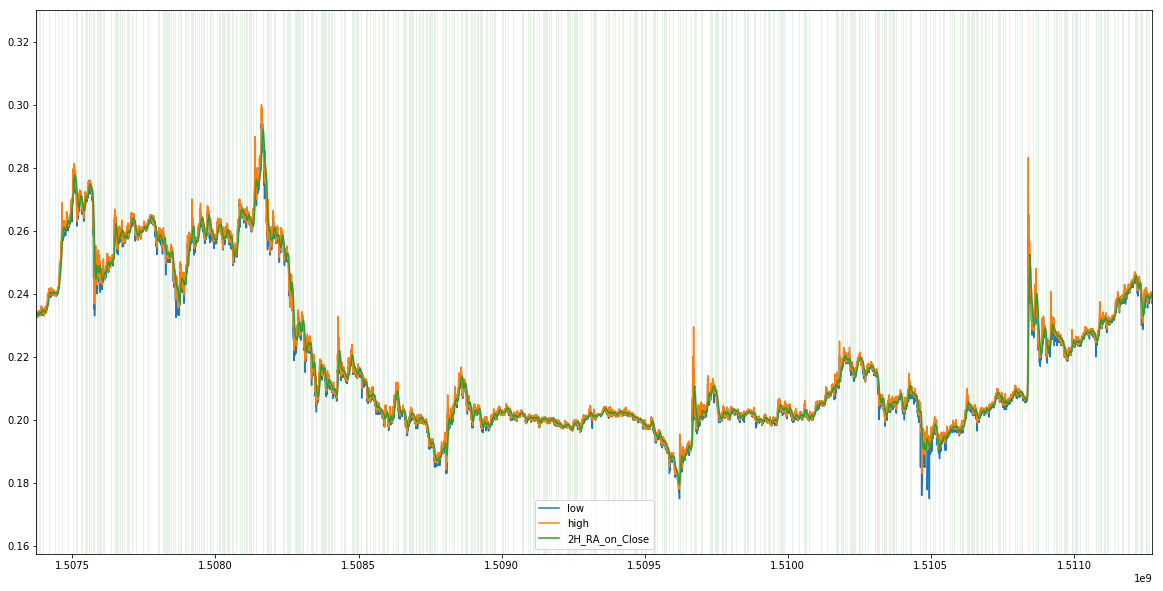

In [96]:
plotting_view(xrp_data_input=XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) & (XRP_Analysis_table['date'] <= 1511274300 )],
             trading_log = transaction_display)

In [ ]:
plotting_view(xrp_data_input=XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) & (XRP_Analysis_table['date'] <= 1511274300 )],
             trading_log = transaction_display)